In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/databetes/data/processed/PNS_2019/dataframe.zip"

In [ ]:
df = pd.read_csv(path)
df

,Sexo,Nascimento,Idade,Etnia,Escolaridade,Peso,Peso Informado,Peso Final,Altura,Altura Informada,...,Dias Álcool,Exercício,Dias Exercício,Hipertensão,Diabetes,Idade Diabetes,Peso Aferido,Altura Aferida,UF,Unidade
0,2,1985,34,1,7,1,49,49,1,159,...,NaN,2,NaN,2,2,NaN,NaN,NaN,NaN,26
1,2,1978,41,4,7,1,62,62,1,173,...,NaN,2,NaN,2,2,NaN,NaN,NaN,NaN,32
2,2,1938,80,1,6,1,93,93,1,164,...,NaN,2,NaN,1,2,NaN,NaN,NaN,NaN,33
3,1,9999,27,4,12,1,95,95,1,178,...,1.0,2,NaN,2,2,NaN,NaN,NaN,NaN,13
4,1,1977,41,1,12,1,97,97,1,180,...,1.0,2,NaN,2,2,NaN,NaN,NaN,NaN,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59311,1,1971,47,4,7,1,70,70,1,160,...,2.0,2,NaN,2,2,NaN,NaN,NaN,NaN,51
59312,1,1998,20,1,7,1,86,86,1,172,...,5.0,1,5.0,2,2,NaN,NaN,NaN,NaN,33
59313,2,1969,49,1,5,1,50,50,1,160,...,NaN,2,NaN,2,2,NaN,NaN,NaN,NaN,11
59314,1,1980,38,1,12,1,92,92,1,170,...,2.0,1,3.0,2,2,NaN,NaN,NaN,NaN,23


In [ ]:
df.columns

Index(['Sexo', 'Nascimento', 'Idade', 'Etnia', 'Escolaridade', 'Peso',
       'Peso Informado', 'Peso Final', 'Altura', 'Altura Informada',
       'Consumo Álcool', 'Dias Álcool', 'Exercício', 'Dias Exercício',
       'Hipertensão', 'Diabetes', 'Idade Diabetes', 'Peso Aferido',
       'Altura Aferida', 'UF', 'Unidade'],
      dtype='object')

# Tirar pessoas menores de 18 anos (ver idade do dia da entrevista)

In [ ]:
# Calcular a idade com base no ano de nascimento e considerando 2019 como o ano atual
df['Idade'] = 2019 - df['Nascimento']

# Filtrar apenas pessoas maiores de 18 anos
df = df[df['Idade'] >= 18]

df

,Sexo,Nascimento,Idade,Etnia,Escolaridade,Peso,Peso Informado,Peso Final,Altura,Altura Informada,...,Dias Álcool,Exercício,Dias Exercício,Hipertensão,Diabetes,Idade Diabetes,Peso Aferido,Altura Aferida,UF,Unidade
0,2,1985,34,1,7,1,49,49,1,159,...,NaN,2,NaN,2,2,NaN,NaN,NaN,NaN,26
1,2,1978,41,4,7,1,62,62,1,173,...,NaN,2,NaN,2,2,NaN,NaN,NaN,NaN,32
2,2,1938,81,1,6,1,93,93,1,164,...,NaN,2,NaN,1,2,NaN,NaN,NaN,NaN,33
4,1,1977,42,1,12,1,97,97,1,180,...,1.0,2,NaN,2,2,NaN,NaN,NaN,NaN,42
5,1,1960,59,4,5,1,64,64,1,158,...,NaN,1,3.0,1,2,NaN,NaN,NaN,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59311,1,1971,48,4,7,1,70,70,1,160,...,2.0,2,NaN,2,2,NaN,NaN,NaN,NaN,51
59312,1,1998,21,1,7,1,86,86,1,172,...,5.0,1,5.0,2,2,NaN,NaN,NaN,NaN,33
59313,2,1969,50,1,5,1,50,50,1,160,...,NaN,2,NaN,2,2,NaN,NaN,NaN,NaN,11
59314,1,1980,39,1,12,1,92,92,1,170,...,2.0,1,3.0,2,2,NaN,NaN,NaN,NaN,23


# Tirar os percentis p99 e p1 para peso, altura.

In [ ]:
# Remover linhas dos percentis p99 e p1 para Peso e Altura
df_filtered = df[~df['Peso'].between(df['Peso'].quantile(0.01), df['Peso'].quantile(0.99))]
df_filtered = df_filtered[~df_filtered['Altura'].between(df_filtered['Altura'].quantile(0.01), df_filtered['Altura'].quantile(0.99))]

# Calcular os percentis p99 e p1 novamente
peso_p99 = df_filtered['Peso'].quantile(0.99)
peso_p1 = df_filtered['Peso'].quantile(0.01)

altura_p99 = df_filtered['Altura'].quantile(0.99)
altura_p1 = df_filtered['Altura'].quantile(0.01)

# Adicionar as linhas dos percentis novamente
df_filtered.loc['P99'] = [float('NaN')] * len(df_filtered.columns)
df_filtered.loc['P1'] = [float('NaN')] * len(df_filtered.columns)

df_filtered.at['P99', 'Peso'] = peso_p99
df_filtered.at['P1', 'Peso'] = peso_p1

df_filtered.at['P99', 'Altura'] = altura_p99
df_filtered.at['P1', 'Altura'] = altura_p1

# Concatenar o DataFrame filtrado com os percentis de volta ao DataFrame original
df_final = pd.concat([df, df_filtered])
df_final

,Sexo,Nascimento,Idade,Etnia,Escolaridade,Peso,Peso Informado,Peso Final,Altura,Altura Informada,...,Dias Álcool,Exercício,Dias Exercício,Hipertensão,Diabetes,Idade Diabetes,Peso Aferido,Altura Aferida,UF,Unidade
0,2.0,1985.0,34.0,1.0,7.0,1.0,49,49.0,1.0,159.0,...,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,26.0
1,2.0,1978.0,41.0,4.0,7.0,1.0,62,62.0,1.0,173.0,...,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,32.0
2,2.0,1938.0,81.0,1.0,6.0,1.0,93,93.0,1.0,164.0,...,NaN,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,33.0
4,1.0,1977.0,42.0,1.0,12.0,1.0,97,97.0,1.0,180.0,...,1.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,42.0
5,1.0,1960.0,59.0,4.0,5.0,1.0,64,64.0,1.0,158.0,...,NaN,1.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59313,2.0,1969.0,50.0,1.0,5.0,1.0,50,50.0,1.0,160.0,...,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,11.0
59314,1.0,1980.0,39.0,1.0,12.0,1.0,92,92.0,1.0,170.0,...,2.0,1.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,23.0
59315,2.0,1982.0,37.0,1.0,12.0,1.0,110,110.0,1.0,176.0,...,NaN,1.0,5.0,1.0,2.0,NaN,NaN,NaN,NaN,52.0
P99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Tirar pessoas que tiveram diagnóstico de diabetes antes dos 18 anos (diabetes tipo 2)

In [ ]:
# Remover pessoas que tiveram diagnóstico de diabetes antes dos 18 anos
# df_final = df_final[df_final['Idade Diabetes'] >= 18]

df_final

,Sexo,Nascimento,Idade,Etnia,Escolaridade,Peso,Peso Informado,Peso Final,Altura,Altura Informada,...,Dias Álcool,Exercício,Dias Exercício,Hipertensão,Diabetes,Idade Diabetes,Peso Aferido,Altura Aferida,UF,Unidade
0,2.0,1985.0,34.0,1.0,7.0,1.0,49,49.0,1.0,159.0,...,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,26.0
1,2.0,1978.0,41.0,4.0,7.0,1.0,62,62.0,1.0,173.0,...,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,32.0
2,2.0,1938.0,81.0,1.0,6.0,1.0,93,93.0,1.0,164.0,...,NaN,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,33.0
4,1.0,1977.0,42.0,1.0,12.0,1.0,97,97.0,1.0,180.0,...,1.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,42.0
5,1.0,1960.0,59.0,4.0,5.0,1.0,64,64.0,1.0,158.0,...,NaN,1.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59313,2.0,1969.0,50.0,1.0,5.0,1.0,50,50.0,1.0,160.0,...,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,11.0
59314,1.0,1980.0,39.0,1.0,12.0,1.0,92,92.0,1.0,170.0,...,2.0,1.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,23.0
59315,2.0,1982.0,37.0,1.0,12.0,1.0,110,110.0,1.0,176.0,...,NaN,1.0,5.0,1.0,2.0,NaN,NaN,NaN,NaN,52.0
P99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Criar a variável IMC

In [ ]:
# Cálculo do IMC
df_final['IMC'] = df_final['Peso Final'] / ((df_final['Altura Informada'] / 100) ** 2)
df_final

,Sexo,Nascimento,Idade,Etnia,Escolaridade,Peso,Peso Informado,Peso Final,Altura,Altura Informada,...,Exercício,Dias Exercício,Hipertensão,Diabetes,Idade Diabetes,Peso Aferido,Altura Aferida,UF,Unidade,IMC
0,2.0,1985.0,34.0,1.0,7.0,1.0,49,49.0,1.0,159.0,...,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,26.0,19.382145
1,2.0,1978.0,41.0,4.0,7.0,1.0,62,62.0,1.0,173.0,...,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,32.0,20.715694
2,2.0,1938.0,81.0,1.0,6.0,1.0,93,93.0,1.0,164.0,...,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,33.0,34.577632
4,1.0,1977.0,42.0,1.0,12.0,1.0,97,97.0,1.0,180.0,...,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,42.0,29.938272
5,1.0,1960.0,59.0,4.0,5.0,1.0,64,64.0,1.0,158.0,...,1.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,12.0,25.636917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59313,2.0,1969.0,50.0,1.0,5.0,1.0,50,50.0,1.0,160.0,...,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,11.0,19.531250
59314,1.0,1980.0,39.0,1.0,12.0,1.0,92,92.0,1.0,170.0,...,1.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,23.0,31.833910
59315,2.0,1982.0,37.0,1.0,12.0,1.0,110,110.0,1.0,176.0,...,1.0,5.0,1.0,2.0,NaN,NaN,NaN,NaN,52.0,35.511364
P99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


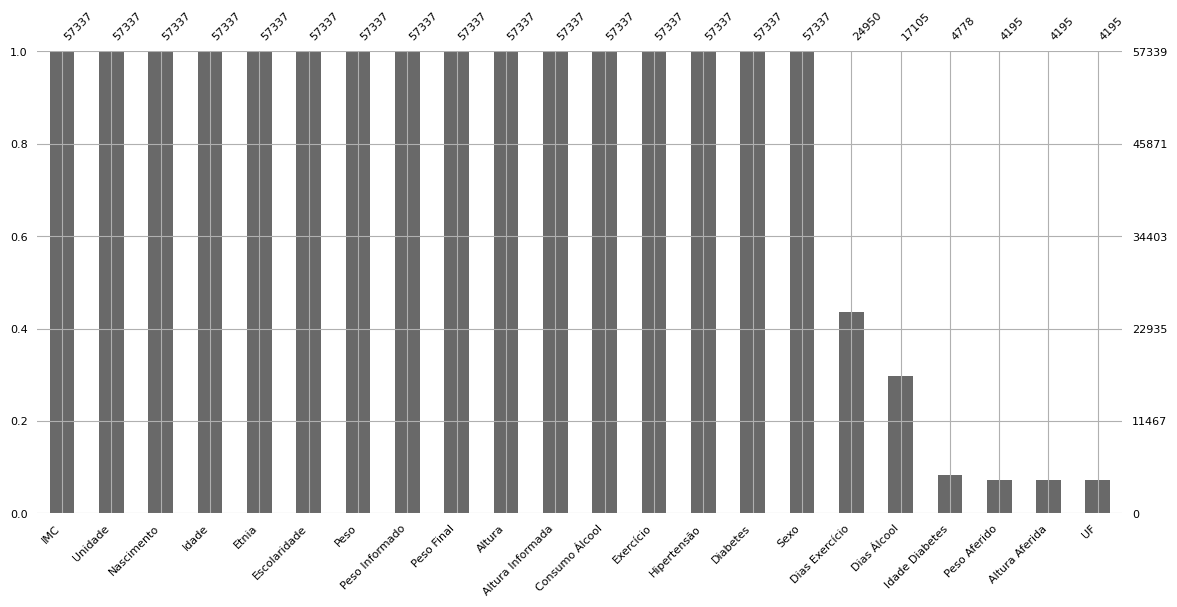

In [ ]:
import missingno as msno

msno.bar(df_final, sort="descending", figsize=(14,6), fontsize=8).grid()

In [ ]:
# df_final.dropna(subset=['EPS'], how='all', inplace=True)

In [ ]:
df_final

,Sexo,Nascimento,Idade,Etnia,Escolaridade,Peso,Peso Informado,Peso Final,Altura,Altura Informada,...,Exercício,Dias Exercício,Hipertensão,Diabetes,Idade Diabetes,Peso Aferido,Altura Aferida,UF,Unidade,IMC
0,2.0,1985.0,34.0,1.0,7.0,1.0,49,49.0,1.0,159.0,...,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,26.0,19.382145
1,2.0,1978.0,41.0,4.0,7.0,1.0,62,62.0,1.0,173.0,...,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,32.0,20.715694
2,2.0,1938.0,81.0,1.0,6.0,1.0,93,93.0,1.0,164.0,...,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,33.0,34.577632
4,1.0,1977.0,42.0,1.0,12.0,1.0,97,97.0,1.0,180.0,...,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,42.0,29.938272
5,1.0,1960.0,59.0,4.0,5.0,1.0,64,64.0,1.0,158.0,...,1.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,12.0,25.636917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59313,2.0,1969.0,50.0,1.0,5.0,1.0,50,50.0,1.0,160.0,...,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,11.0,19.531250
59314,1.0,1980.0,39.0,1.0,12.0,1.0,92,92.0,1.0,170.0,...,1.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,23.0,31.833910
59315,2.0,1982.0,37.0,1.0,12.0,1.0,110,110.0,1.0,176.0,...,1.0,5.0,1.0,2.0,NaN,NaN,NaN,NaN,52.0,35.511364
P99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_final = df_final[['IMC', 'Diabetes','Hipertensão','Exercício','Escolaridade', 'Consumo Álcool','Idade', 'Dias Álcool','Unidade']]
df_final

,IMC,Diabetes,Hipertensão,Exercício,Escolaridade,Consumo Álcool,Idade,Dias Álcool,Unidade
0,19.382145,2.0,2.0,2.0,7.0,1.0,34.0,NaN,26.0
1,20.715694,2.0,2.0,2.0,7.0,1.0,41.0,NaN,32.0
2,34.577632,2.0,1.0,2.0,6.0,1.0,81.0,NaN,33.0
4,29.938272,2.0,2.0,2.0,12.0,3.0,42.0,1.0,42.0
5,25.636917,2.0,1.0,1.0,5.0,1.0,59.0,NaN,12.0
...,...,...,...,...,...,...,...,...,...
59313,19.531250,2.0,2.0,2.0,5.0,1.0,50.0,NaN,11.0
59314,31.833910,2.0,2.0,1.0,12.0,3.0,39.0,2.0,23.0
59315,35.511364,2.0,1.0,1.0,12.0,1.0,37.0,NaN,52.0
P99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cols_to_rename={ "Hipertensão": "pressao_alta","Escolaridade":"grau_escolaridade","Consumo Álcool":"bebida_alcoolica","Exercício":"exercicio_fisico","freq_alcool":"Consumo Álcool","fet":"faixa_etaria","Diabetes":'diabetes'}


df_final = df_final.rename(columns=cols_to_rename)

In [ ]:
df_final

,IMC,diabetes,pressao_alta,exercicio_fisico,grau_escolaridade,bebida_alcoolica,Idade,Dias Álcool,Unidade
0,19.382145,2.0,2.0,2.0,7.0,1.0,34.0,NaN,26.0
1,20.715694,2.0,2.0,2.0,7.0,1.0,41.0,NaN,32.0
2,34.577632,2.0,1.0,2.0,6.0,1.0,81.0,NaN,33.0
4,29.938272,2.0,2.0,2.0,12.0,3.0,42.0,1.0,42.0
5,25.636917,2.0,1.0,1.0,5.0,1.0,59.0,NaN,12.0
...,...,...,...,...,...,...,...,...,...
59313,19.531250,2.0,2.0,2.0,5.0,1.0,50.0,NaN,11.0
59314,31.833910,2.0,2.0,1.0,12.0,3.0,39.0,2.0,23.0
59315,35.511364,2.0,1.0,1.0,12.0,1.0,37.0,NaN,52.0
P99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def converter_idade(idade):
    if idade >= 18 and idade <= 24:
        return '18 a 24 anos'
    elif idade >= 25 and idade <= 34:
        return '25 a 34 anos'
    elif idade >= 35 and idade <= 44:
        return '35 a 44 anos'
    elif idade >= 45 and idade <= 54:
        return '45 a 54 anos'
    elif idade >= 55 and idade <= 64:
        return '55 a 64 anos'
    else:
        return '65 anos e mais'

df_final['Idade'] = df_final['Idade'].apply(converter_idade)
df_final

,IMC,diabetes,pressao_alta,exercicio_fisico,grau_escolaridade,bebida_alcoolica,Idade,Dias Álcool,Unidade
0,19.382145,2.0,2.0,2.0,7.0,1.0,25 a 34 anos,NaN,26.0
1,20.715694,2.0,2.0,2.0,7.0,1.0,35 a 44 anos,NaN,32.0
2,34.577632,2.0,1.0,2.0,6.0,1.0,65 anos e mais,NaN,33.0
4,29.938272,2.0,2.0,2.0,12.0,3.0,35 a 44 anos,1.0,42.0
5,25.636917,2.0,1.0,1.0,5.0,1.0,55 a 64 anos,NaN,12.0
...,...,...,...,...,...,...,...,...,...
59313,19.531250,2.0,2.0,2.0,5.0,1.0,45 a 54 anos,NaN,11.0
59314,31.833910,2.0,2.0,1.0,12.0,3.0,35 a 44 anos,2.0,23.0
59315,35.511364,2.0,1.0,1.0,12.0,1.0,35 a 44 anos,NaN,52.0
P99,NaN,NaN,NaN,NaN,NaN,NaN,65 anos e mais,NaN,NaN


In [ ]:
# Mapeando as classificações para as categorias desejadas
mapeamento = {
    1: 'curso primário',
    2: 'curso ginasial ou ginásio',
    3: '1º grau ou fundamental ou supletivo de 1º grau',
    4: 'admissão',
    5: 'nunca estudou',
    6: 'curso ginasial ou ginásio',
    7: '2º grau ou colégio ou técnico ou normal ou científico científico ou ensino médio ou supletivo de 2º grau',
    8: 'admissão',
    9: '3º grau ou curso superior',
    10: '2º grau ou colégio ou técnico ou normal ou científico científico ou ensino médio ou supletivo de 2º grau',
    11: 'admissão',
    12: '3º grau ou curso superior',
    13: 'pós-graduação (especialização, mestrado, doutorado)',
    14: 'pós-graduação (especialização, mestrado, doutorado)',
    15: 'pós-graduação (especialização, mestrado, doutorado)',
    99: None
}

# Aplicando o mapeamento e removendo o valor 99
df_final['grau_escolaridade'] = df_final['grau_escolaridade'].replace(mapeamento)
df_final


,IMC,diabetes,pressao_alta,exercicio_fisico,grau_escolaridade,bebida_alcoolica,Idade,Dias Álcool,Unidade
0,19.382145,2.0,2.0,2.0,2º grau ou colégio ou técnico ou normal ou cie...,1.0,25 a 34 anos,NaN,26.0
1,20.715694,2.0,2.0,2.0,2º grau ou colégio ou técnico ou normal ou cie...,1.0,35 a 44 anos,NaN,32.0
2,34.577632,2.0,1.0,2.0,curso ginasial ou ginásio,1.0,65 anos e mais,NaN,33.0
4,29.938272,2.0,2.0,2.0,3º grau ou curso superior,3.0,35 a 44 anos,1.0,42.0
5,25.636917,2.0,1.0,1.0,nunca estudou,1.0,55 a 64 anos,NaN,12.0
...,...,...,...,...,...,...,...,...,...
59313,19.531250,2.0,2.0,2.0,nunca estudou,1.0,45 a 54 anos,NaN,11.0
59314,31.833910,2.0,2.0,1.0,3º grau ou curso superior,3.0,35 a 44 anos,2.0,23.0
59315,35.511364,2.0,1.0,1.0,3º grau ou curso superior,1.0,35 a 44 anos,NaN,52.0
P99,NaN,NaN,NaN,NaN,NaN,NaN,65 anos e mais,NaN,NaN


In [ ]:
# Removendo as linhas com valor None (99)
df_final = df_final.dropna(subset='grau_escolaridade')
diab_dict = {1: '1',2: '0'}
df_final['diabetes'] = df_final['diabetes'].map(diab_dict)

df_final

<ipython-input-107-65a980c35e9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['diabetes'] = df_final['diabetes'].map(diab_dict)


,IMC,diabetes,pressao_alta,exercicio_fisico,grau_escolaridade,bebida_alcoolica,Idade,Dias Álcool,Unidade
0,19.382145,0,2.0,2.0,2º grau ou colégio ou técnico ou normal ou cie...,1.0,25 a 34 anos,NaN,26.0
1,20.715694,0,2.0,2.0,2º grau ou colégio ou técnico ou normal ou cie...,1.0,35 a 44 anos,NaN,32.0
2,34.577632,0,1.0,2.0,curso ginasial ou ginásio,1.0,65 anos e mais,NaN,33.0
4,29.938272,0,2.0,2.0,3º grau ou curso superior,3.0,35 a 44 anos,1.0,42.0
5,25.636917,0,1.0,1.0,nunca estudou,1.0,55 a 64 anos,NaN,12.0
...,...,...,...,...,...,...,...,...,...
59311,27.343750,0,2.0,2.0,2º grau ou colégio ou técnico ou normal ou cie...,3.0,45 a 54 anos,2.0,51.0
59312,29.069767,0,2.0,1.0,2º grau ou colégio ou técnico ou normal ou cie...,3.0,18 a 24 anos,5.0,33.0
59313,19.531250,0,2.0,2.0,nunca estudou,1.0,45 a 54 anos,NaN,11.0
59314,31.833910,0,2.0,1.0,3º grau ou curso superior,3.0,35 a 44 anos,2.0,23.0


In [ ]:
df_final['diabetes'] = df_final['diabetes'].astype(int)
df_final

<ipython-input-108-dfb9599dad2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['diabetes'] = df_final['diabetes'].astype(int)


,IMC,diabetes,pressao_alta,exercicio_fisico,grau_escolaridade,bebida_alcoolica,Idade,Dias Álcool,Unidade
0,19.382145,0,2.0,2.0,2º grau ou colégio ou técnico ou normal ou cie...,1.0,25 a 34 anos,NaN,26.0
1,20.715694,0,2.0,2.0,2º grau ou colégio ou técnico ou normal ou cie...,1.0,35 a 44 anos,NaN,32.0
2,34.577632,0,1.0,2.0,curso ginasial ou ginásio,1.0,65 anos e mais,NaN,33.0
4,29.938272,0,2.0,2.0,3º grau ou curso superior,3.0,35 a 44 anos,1.0,42.0
5,25.636917,0,1.0,1.0,nunca estudou,1.0,55 a 64 anos,NaN,12.0
...,...,...,...,...,...,...,...,...,...
59311,27.343750,0,2.0,2.0,2º grau ou colégio ou técnico ou normal ou cie...,3.0,45 a 54 anos,2.0,51.0
59312,29.069767,0,2.0,1.0,2º grau ou colégio ou técnico ou normal ou cie...,3.0,18 a 24 anos,5.0,33.0
59313,19.531250,0,2.0,2.0,nunca estudou,1.0,45 a 54 anos,NaN,11.0
59314,31.833910,0,2.0,1.0,3º grau ou curso superior,3.0,35 a 44 anos,2.0,23.0


In [ ]:
# Mapeamento das classificações
mapping = {
    1: '0',
    2: '1',
    3:'2'
}
# nunca bebe, menos de uma vez por mes, menos de uma vez por semana, os outros não foram adaptados
# Aplicando o mapeamento na coluna "bebida_alcoolica"
df_final['bebida_alcoolica'] =df_final['bebida_alcoolica'].map(mapping)
df_final['bebida_alcoolica'] = df_final['bebida_alcoolica'].astype(int)
df_final

<ipython-input-109-701717c5b62d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['bebida_alcoolica'] =df_final['bebida_alcoolica'].map(mapping)
<ipython-input-109-701717c5b62d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['bebida_alcoolica'] = df_final['bebida_alcoolica'].astype(int)


,IMC,diabetes,pressao_alta,exercicio_fisico,grau_escolaridade,bebida_alcoolica,Idade,Dias Álcool,Unidade
0,19.382145,0,2.0,2.0,2º grau ou colégio ou técnico ou normal ou cie...,0,25 a 34 anos,NaN,26.0
1,20.715694,0,2.0,2.0,2º grau ou colégio ou técnico ou normal ou cie...,0,35 a 44 anos,NaN,32.0
2,34.577632,0,1.0,2.0,curso ginasial ou ginásio,0,65 anos e mais,NaN,33.0
4,29.938272,0,2.0,2.0,3º grau ou curso superior,2,35 a 44 anos,1.0,42.0
5,25.636917,0,1.0,1.0,nunca estudou,0,55 a 64 anos,NaN,12.0
...,...,...,...,...,...,...,...,...,...
59311,27.343750,0,2.0,2.0,2º grau ou colégio ou técnico ou normal ou cie...,2,45 a 54 anos,2.0,51.0
59312,29.069767,0,2.0,1.0,2º grau ou colégio ou técnico ou normal ou cie...,2,18 a 24 anos,5.0,33.0
59313,19.531250,0,2.0,2.0,nunca estudou,0,45 a 54 anos,NaN,11.0
59314,31.833910,0,2.0,1.0,3º grau ou curso superior,2,35 a 44 anos,2.0,23.0


In [ ]:
# Mapeamento das classificações
mapping = {
    1: 'sim',
    2: 'não'
}
# nunca bebe, menos de uma vez por mes, menos de uma vez por semana, os outros não foram adaptados
# Aplicando o mapeamento na coluna "bebida_alcoolica"
df_final['exercicio_fisico'] =df_final['exercicio_fisico'].map(mapping)
# df_final['exercicio_fisico'] = df_final['exercicio_fisico'].astype(int)
df_final

<ipython-input-110-343e744499bc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['exercicio_fisico'] =df_final['exercicio_fisico'].map(mapping)


,IMC,diabetes,pressao_alta,exercicio_fisico,grau_escolaridade,bebida_alcoolica,Idade,Dias Álcool,Unidade
0,19.382145,0,2.0,não,2º grau ou colégio ou técnico ou normal ou cie...,0,25 a 34 anos,NaN,26.0
1,20.715694,0,2.0,não,2º grau ou colégio ou técnico ou normal ou cie...,0,35 a 44 anos,NaN,32.0
2,34.577632,0,1.0,não,curso ginasial ou ginásio,0,65 anos e mais,NaN,33.0
4,29.938272,0,2.0,não,3º grau ou curso superior,2,35 a 44 anos,1.0,42.0
5,25.636917,0,1.0,sim,nunca estudou,0,55 a 64 anos,NaN,12.0
...,...,...,...,...,...,...,...,...,...
59311,27.343750,0,2.0,não,2º grau ou colégio ou técnico ou normal ou cie...,2,45 a 54 anos,2.0,51.0
59312,29.069767,0,2.0,sim,2º grau ou colégio ou técnico ou normal ou cie...,2,18 a 24 anos,5.0,33.0
59313,19.531250,0,2.0,não,nunca estudou,0,45 a 54 anos,NaN,11.0
59314,31.833910,0,2.0,sim,3º grau ou curso superior,2,35 a 44 anos,2.0,23.0


In [ ]:
# Mapeamento das classificações
mapping = {
    1: 'sim',
    2: 'não'
}
# nunca bebe, menos de uma vez por mes, menos de uma vez por semana, os outros não foram adaptados
# Aplicando o mapeamento na coluna "bebida_alcoolica"
df_final['pressao_alta'] =df_final['pressao_alta'].map(mapping)
# df_final['pressao_alta'] = df_final['pressao_alta'].astype(int)
df_final

<ipython-input-111-1571a50dd478>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['pressao_alta'] =df_final['pressao_alta'].map(mapping)


,IMC,diabetes,pressao_alta,exercicio_fisico,grau_escolaridade,bebida_alcoolica,Idade,Dias Álcool,Unidade
0,19.382145,0,não,não,2º grau ou colégio ou técnico ou normal ou cie...,0,25 a 34 anos,NaN,26.0
1,20.715694,0,não,não,2º grau ou colégio ou técnico ou normal ou cie...,0,35 a 44 anos,NaN,32.0
2,34.577632,0,sim,não,curso ginasial ou ginásio,0,65 anos e mais,NaN,33.0
4,29.938272,0,não,não,3º grau ou curso superior,2,35 a 44 anos,1.0,42.0
5,25.636917,0,sim,sim,nunca estudou,0,55 a 64 anos,NaN,12.0
...,...,...,...,...,...,...,...,...,...
59311,27.343750,0,não,não,2º grau ou colégio ou técnico ou normal ou cie...,2,45 a 54 anos,2.0,51.0
59312,29.069767,0,não,sim,2º grau ou colégio ou técnico ou normal ou cie...,2,18 a 24 anos,5.0,33.0
59313,19.531250,0,não,não,nunca estudou,0,45 a 54 anos,NaN,11.0
59314,31.833910,0,não,sim,3º grau ou curso superior,2,35 a 44 anos,2.0,23.0


In [ ]:
mapeamento = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

# Aplicando o mapeamento na coluna "Estado"
df_final['Unidade'] = df_final['Unidade'].replace(mapeamento)

df_final

<ipython-input-112-b734679e6ab5>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Unidade'] = df_final['Unidade'].replace(mapeamento)


,IMC,diabetes,pressao_alta,exercicio_fisico,grau_escolaridade,bebida_alcoolica,Idade,Dias Álcool,Unidade
0,19.382145,0,não,não,2º grau ou colégio ou técnico ou normal ou cie...,0,25 a 34 anos,NaN,Pernambuco
1,20.715694,0,não,não,2º grau ou colégio ou técnico ou normal ou cie...,0,35 a 44 anos,NaN,Espírito Santo
2,34.577632,0,sim,não,curso ginasial ou ginásio,0,65 anos e mais,NaN,Rio de Janeiro
4,29.938272,0,não,não,3º grau ou curso superior,2,35 a 44 anos,1.0,Santa Catarina
5,25.636917,0,sim,sim,nunca estudou,0,55 a 64 anos,NaN,Acre
...,...,...,...,...,...,...,...,...,...
59311,27.343750,0,não,não,2º grau ou colégio ou técnico ou normal ou cie...,2,45 a 54 anos,2.0,Mato Grosso
59312,29.069767,0,não,sim,2º grau ou colégio ou técnico ou normal ou cie...,2,18 a 24 anos,5.0,Rio de Janeiro
59313,19.531250,0,não,não,nunca estudou,0,45 a 54 anos,NaN,Rondônia
59314,31.833910,0,não,sim,3º grau ou curso superior,2,35 a 44 anos,2.0,Ceará


In [ ]:
df_final[df_final['diabetes']==1]

,IMC,diabetes,pressao_alta,exercicio_fisico,grau_escolaridade,bebida_alcoolica,Idade,Dias Álcool,Unidade
8,34.475250,1,não,sim,2º grau ou colégio ou técnico ou normal ou cie...,0,45 a 54 anos,NaN,Paraná
14,27.239224,1,não,sim,"pós-graduação (especialização, mestrado, douto...",2,35 a 44 anos,0.0,Rio Grande do Sul
35,25.099502,1,sim,sim,2º grau ou colégio ou técnico ou normal ou cie...,0,65 anos e mais,NaN,Alagoas
63,25.990903,1,sim,não,3º grau ou curso superior,2,55 a 64 anos,1.0,Amazonas
85,27.055151,1,sim,não,nunca estudou,0,65 anos e mais,NaN,Tocantins
...,...,...,...,...,...,...,...,...,...
59223,24.221453,1,sim,não,2º grau ou colégio ou técnico ou normal ou cie...,0,65 anos e mais,NaN,Espírito Santo
59225,31.229454,1,sim,não,2º grau ou colégio ou técnico ou normal ou cie...,2,45 a 54 anos,2.0,Rio de Janeiro
59251,27.609452,1,sim,sim,2º grau ou colégio ou técnico ou normal ou cie...,0,65 anos e mais,NaN,Mato Grosso
59276,28.282828,1,sim,não,3º grau ou curso superior,2,55 a 64 anos,0.0,Rio de Janeiro


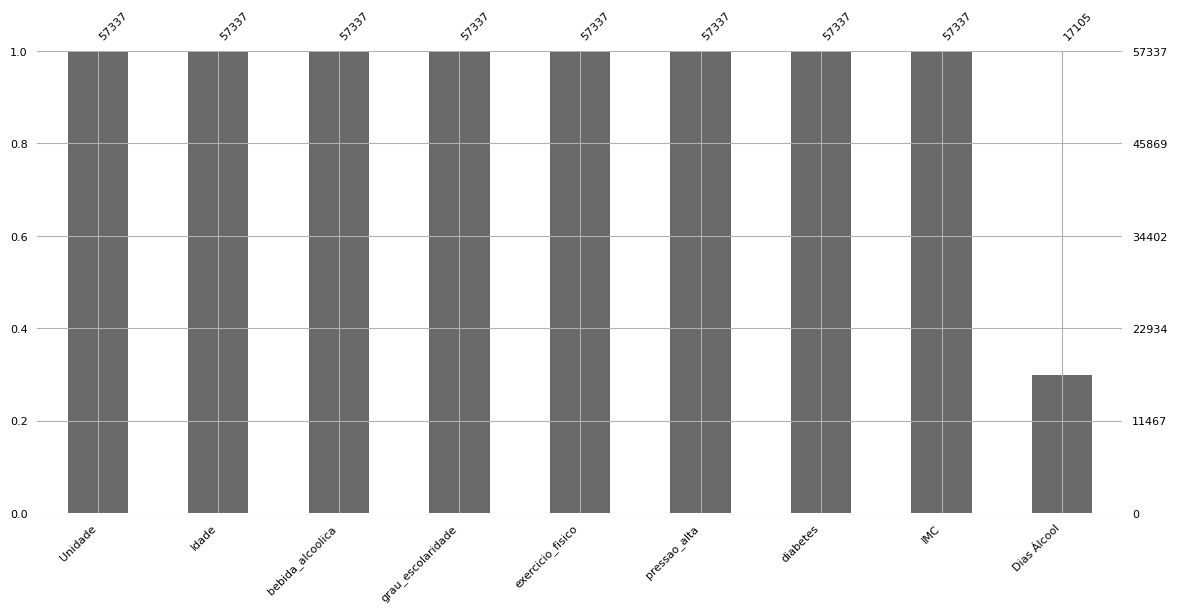

In [ ]:

msno.bar(df_final, sort="descending", figsize=(14,6), fontsize=8).grid()

In [ ]:
# 'Sexo', 'Nascimento', 'Idade', 'Etnia', 'Escolaridade', 'Peso',
#        'Peso Informado', 'Peso Final', 'Altura', 'Altura Informada',
#        'Consumo Álcool', 'Dias Álcool', 'Exercício', 'Dias Exercício',
#        'Hipertensão', 'Diabetes', 'Idade Diabetes', 'Peso Aferido',
#        'Altura Aferida', 'UF', 'Unidade'



1.   faixa etaria converter,consumo álcool, ver cada uma das outras variaveis
2.   Item da lista



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


,Unidade,diabetes,count,percentage
1,Acre,1,79,7.129964
3,Alagoas,1,145,9.545754
5,Amapá,1,62,6.709957
7,Amazonas,1,132,7.189542
9,Bahia,1,178,8.229311
11,Ceará,1,199,8.980144
13,Distrito Federal,1,135,8.282209
15,Espírito Santo,1,184,7.085098
17,Goiás,1,205,10.469867
19,Maranhão,1,144,5.801773


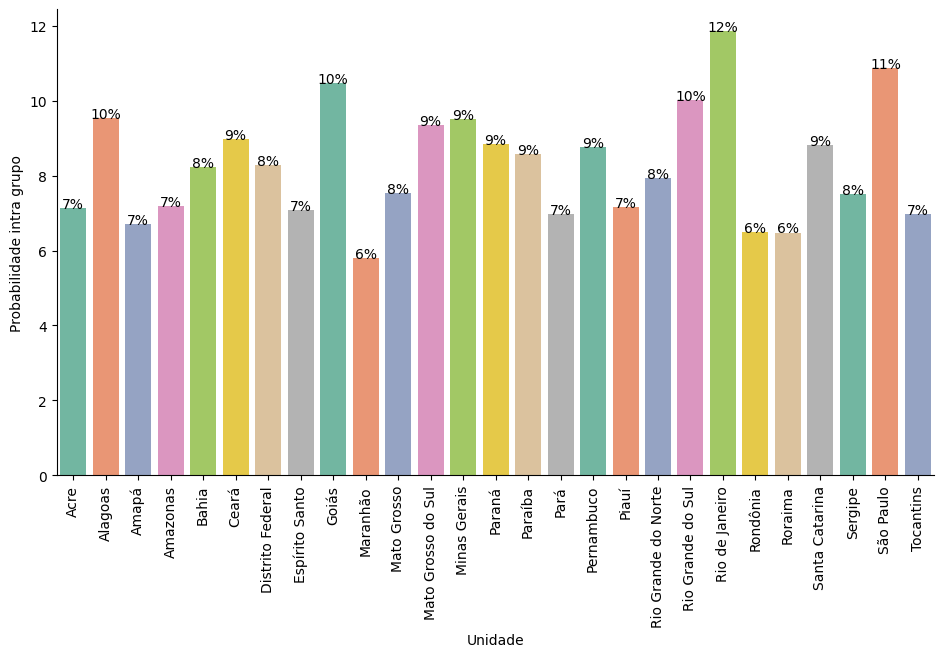

In [ ]:
def catplot_var_general(df,x_,hue_,title_,graph ='bar',height_=5,aspect_=1,x_values=None,xtick_rotation=None,display_data=True,palette=sns.color_palette("Set2"),savefig=False,path=None,sort_list=None,xlabel=None):
    """
    Faz o plot geral de uma variável categórica pelo 'hue_'. Ex: plot de sexo no x_ e hue_ diabetes irá exibir um plot relacionando os dois
    Recebe a lista de anos a serem analisados, o título, rótulos do eixo x e parâmetros opcionais de estilização
    """
    df_plot = df

    # Groupby coluna e 'diabetes' com contagem dos casos
    diabetes_count = df.groupby([x_, hue_]).size().reset_index(name='count')

    # Cálculo da porcentagem pela outra coluna
    total_per_gender = diabetes_count.groupby(x_)['count'].transform('sum')
    diabetes_count['percentage'] = diabetes_count['count'] / total_per_gender * 100
    diabetes_count = diabetes_count[diabetes_count['diabetes'].astype(int)==1]
    if sort_list != None:
      diabetes_count = diabetes_count.set_index(x_)
      diabetes_count = diabetes_count.reindex(index = sort_list)
      diabetes_count = diabetes_count.reset_index()

    if display_data == True:
      display(diabetes_count)

    if graph == 'bar':
          ax = sns.catplot(x=x_,y='percentage', kind='bar', data=diabetes_count, legend=True,height=height_,aspect=aspect_,palette=palette
                      )
    elif graph == 'line':
      ax = sns.lineplot(x=x_,y='percentage',  data=diabetes_count, legend=True,palette=palette
                    )

    # plt.title(f'{title_}')
    if x_values != None:
      ax.set_xticklabels(x_values)
    if xtick_rotation != None:
      plt.xticks(rotation = xtick_rotation)

    plt.ylabel('Probabilidade intra grupo')

    # Mostrar porcentagens
    total = len(df_plot)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height , f'{height:.0f}%', ha='center', fontsize=10)

    if savefig == True:
      fig1 = plt.gcf()
      fig1.savefig(path,dpi=300,bbox_inches='tight')

    if xlabel != None:
      plt.xlabel(xlabel)
    plt.show()
    plt.close()


catplot_var_general(df_final,'Unidade','diabetes',f'Diabetes no dataset da PNS pelos anos', 'bar',height_=5.4, aspect_=9.7/5.4,xtick_rotation=90,savefig=True,path="drive/My Drive/databetes/assets/gustavo/plots/pns_diab_uf.png")

In [ ]:
df_final

,IMC,diabetes,pressao_alta,exercicio_fisico,grau_escolaridade,bebida_alcoolica,Idade,Dias Álcool,Unidade
0,19.382145,0,não,não,2º grau ou colégio ou técnico ou normal ou cie...,0,25 a 34 anos,NaN,Pernambuco
1,20.715694,0,não,não,2º grau ou colégio ou técnico ou normal ou cie...,0,35 a 44 anos,NaN,Espírito Santo
2,34.577632,0,sim,não,curso ginasial ou ginásio,0,65 anos e mais,NaN,Rio de Janeiro
4,29.938272,0,não,não,3º grau ou curso superior,2,35 a 44 anos,1.0,Santa Catarina
5,25.636917,0,sim,sim,nunca estudou,0,55 a 64 anos,NaN,Acre
...,...,...,...,...,...,...,...,...,...
59311,27.343750,0,não,não,2º grau ou colégio ou técnico ou normal ou cie...,2,45 a 54 anos,2.0,Mato Grosso
59312,29.069767,0,não,sim,2º grau ou colégio ou técnico ou normal ou cie...,2,18 a 24 anos,5.0,Rio de Janeiro
59313,19.531250,0,não,não,nunca estudou,0,45 a 54 anos,NaN,Rondônia
59314,31.833910,0,não,sim,3º grau ou curso superior,2,35 a 44 anos,2.0,Ceará


são paulo e maranhão, comparar com o modelo

In [ ]:
df_final.to_csv("drive/My Drive/databetes/data/processed/PNS_2019/pns_model_test.csv",index=False)

In [ ]:
aa

NameError: ignored

# Retirar os missings e os valores espúrios

In [ ]:
# Remover linhas com valores missing
df_final = df_final.dropna()

# Remover linhas com valores espúrios (exemplo: Peso menor que 0)
df_final = df_final[(df_final['Peso Final'] >= 0) & (df_final['Altura Informada'] >= 0)]
df_final

In [ ]:
df_final.info()

ver as colunas iguais ao vigitel
